# TP scientific analisys

## Natalia Debandi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO


In [2]:
#leo el archivo desde mi computadora
online = False
if (online == True):
    url = requests.get('https://drive.google.com/file/d/1xS091zSODR9431r7GNJI4IYHoFRCCQCr/view?usp=sharing')
    csv_raw = StringIO(url.text)
    signals = pd.read_csv(csv_raw, delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])
else:
    signals = pd.read_csv('C:\\Users\\natal\\OneDrive\\Nat2022\\Analisis datos\\datasets\\datos-cientificos\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

##lo guarde en el proyecto
##base = pd.read_csv('TPfinal\\data\\eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

print('Estructura de la informacion :')
print('signals')
print(signals.head())

Estructura de la informacion :
signals
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0


In [3]:
##tomo los valores de eeg en un tensor de nunpy
data=signals.values
eeg_val=data[:,2]
print(eeg_val)

[ 32.  40.  42. ...  91. 114. 103.]


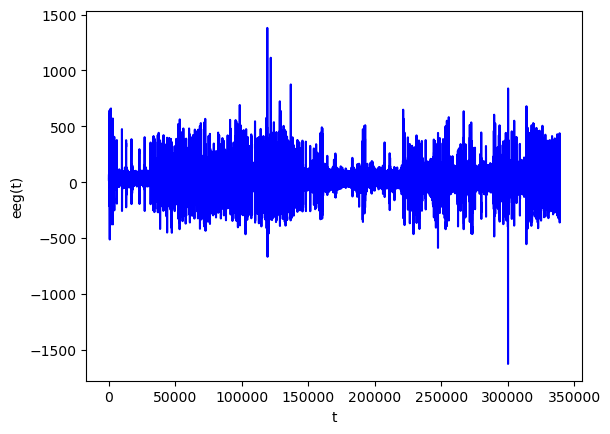

In [4]:
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');

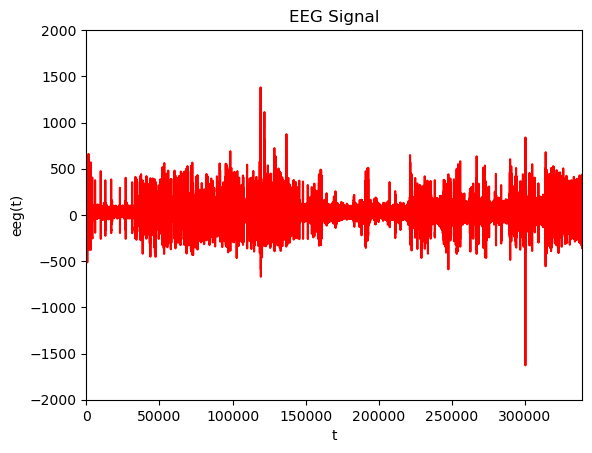

In [5]:
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()


In [6]:
signals.describe()

,timestamp,counter,eeg,attention,meditation,blinking
count,3.393010e+05,339301.000000,339301.000000,339301.000000,339301.000000,339301.0
mean,1.655925e+09,49.501127,31.001577,64.062720,41.658757,0.0
std,1.905190e+02,28.867526,90.962463,21.247321,17.424993,0.0
min,1.655925e+09,0.000000,-1628.000000,0.000000,0.000000,0.0
25%,1.655925e+09,24.000000,3.000000,47.000000,29.000000,0.0
50%,1.655925e+09,50.000000,33.000000,64.000000,41.000000,0.0
75%,1.655925e+09,75.000000,60.000000,81.000000,53.000000,0.0
max,1.655925e+09,99.000000,1380.000000,100.000000,100.000000,0.0


In [7]:
#import seaborn as sns
#sns.set(style="darkgrid")
#sns.lineplot(x="timestamp", y="eeg", hue="attention", data=signals)
#import matplotlib.pyplot as plt
#plt.show()

In [8]:
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking
0,1.655925e+09,68,32,0,0,0
1,1.655925e+09,69,40,0,0,0
2,1.655925e+09,70,42,0,0,0
3,1.655925e+09,71,34,0,0,0
4,1.655925e+09,72,24,0,0,0


In [9]:
#quiero pasar el timestamp a fecha para poder sincronizar con el video

from datetime import datetime
signals.loc[1].iat[0]
fecha=datetime.fromtimestamp(signals.loc[1].iat[0])
print(fecha)

2022-06-22 16:06:04.970000


In [10]:
signals.dtypes
signals['date']=pd.to_datetime(signals['timestamp'], unit='s')
signals.head()

,timestamp,counter,eeg,attention,meditation,blinking,date
0,1.655925e+09,68,32,0,0,0,2022-06-22 19:06:04.970000128
1,1.655925e+09,69,40,0,0,0,2022-06-22 19:06:04.970000128
2,1.655925e+09,70,42,0,0,0,2022-06-22 19:06:04.970000128
3,1.655925e+09,71,34,0,0,0,2022-06-22 19:06:04.970000128
4,1.655925e+09,72,24,0,0,0,2022-06-22 19:06:04.970000128


El primer valor de la serie es 2022-06-22 19:06 mientras que el video arranca en el 2022-06-22 20:05.
El maximo valor de date es '2022-06-22 19:17:04.920000'

In [11]:
##reviso la diferencia entre los horarios para ver como sincronizar con el video
from datetime import datetime, timedelta

#create new column that contains timedelta between start and end
diff =  pd.to_datetime('2022-06-22 20:05') -  pd.to_datetime('2022-06-22 19:06')
#print(diff)

result = signals['date'].iat[0] + timedelta(minutes=59)
print(result)

2022-06-22 20:05:04.970000128


In [12]:
# sumo la diferencia de 59 minutos para sincronizar mejor con el video
signals['date']=signals['date'] + timedelta(minutes=59)
#signals.head()

In [13]:
#signals_filtered=signals[]
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.lineplot(x="date", y="eeg", data=signals)
#plt.show()


# Señal baseline
Para tomar la señal de baseline voy a seleccionar 60 segundos, de modo que esté equilibrado con el conjunto de Tos entre las 06:20 y 07:20 que arranca la tos.

In [14]:
#quiero filtrar una parte de la señal
signals_baseline=signals[(signals.date >'2022-06-22 20:06:20') & (signals.date <'2022-06-22 20:07:20')]
signals_baseline.head()
#signals_baseline.describe()

,timestamp,counter,eeg,attention,meditation,blinking,date
38583,1.655925e+09,51,21,69,24,0,2022-06-22 20:06:20.009999872
38584,1.655925e+09,52,16,69,24,0,2022-06-22 20:06:20.009999872
38585,1.655925e+09,53,9,69,24,0,2022-06-22 20:06:20.009999872
38586,1.655925e+09,54,-10,69,24,0,2022-06-22 20:06:20.009999872
38587,1.655925e+09,55,-38,69,24,0,2022-06-22 20:06:20.009999872


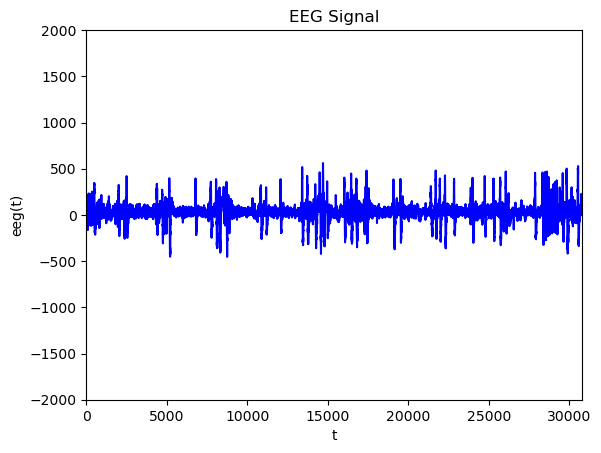

In [15]:
data=signals_baseline.values
eeg_val=data[:,2]
plt.plot(eeg_val,'b', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

# Analizo la parte de la tos

Son 60 segundos desde 07:20. A partir de acá cada una de los cambios se produce cada 60 segundos aparoximadamente

In [16]:
#filtro los datos de tos
signals_tos=signals[(signals.date >'2022-06-22 20:07:20') & (signals.date <'2022-06-22 20:08:20')]
signals_tos.head()
#signals_tos.describe()

,timestamp,counter,eeg,attention,meditation,blinking,date
69403,1.655925e+09,11,23,35,26,0,2022-06-22 20:07:20.009999872
69404,1.655925e+09,12,22,35,26,0,2022-06-22 20:07:20.009999872
69405,1.655925e+09,13,35,35,26,0,2022-06-22 20:07:20.009999872
69406,1.655925e+09,14,54,35,26,0,2022-06-22 20:07:20.009999872
69407,1.655925e+09,15,61,35,26,0,2022-06-22 20:07:20.009999872


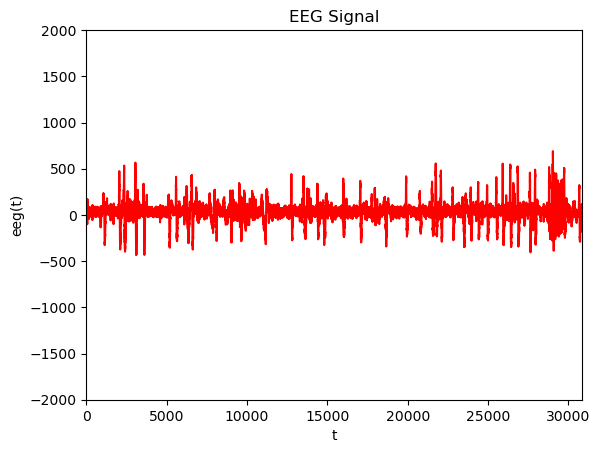

In [17]:
data=signals_tos.values
eeg_val=data[:,2]
plt.plot(eeg_val,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

# Reconstruccion de señal con etiquetas
Reconstruyo una señal con la parte del baseline y de la tos nada más con la etiqueta de tos (1). Voy a trabajar analizando esta señal mas chica para probar aplicar filtros y extraer features.

In [18]:
zz=np.zeros(signals_baseline['date'].size,dtype=int)
signals_baseline = signals_baseline.assign(tos=zz)
#print(zz)
signals_baseline.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos
38583,1.655925e+09,51,21,69,24,0,2022-06-22 20:06:20.009999872,0
38584,1.655925e+09,52,16,69,24,0,2022-06-22 20:06:20.009999872,0
38585,1.655925e+09,53,9,69,24,0,2022-06-22 20:06:20.009999872,0
38586,1.655925e+09,54,-10,69,24,0,2022-06-22 20:06:20.009999872,0
38587,1.655925e+09,55,-38,69,24,0,2022-06-22 20:06:20.009999872,0


In [19]:
zz=np.ones(signals_tos['date'].size,dtype=int)
signals_tos = signals_tos.assign(tos=zz)
#print(zz)
signals_tos.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos
69403,1.655925e+09,11,23,35,26,0,2022-06-22 20:07:20.009999872,1
69404,1.655925e+09,12,22,35,26,0,2022-06-22 20:07:20.009999872,1
69405,1.655925e+09,13,35,35,26,0,2022-06-22 20:07:20.009999872,1
69406,1.655925e+09,14,54,35,26,0,2022-06-22 20:07:20.009999872,1
69407,1.655925e+09,15,61,35,26,0,2022-06-22 20:07:20.009999872,1


In [20]:
##uno los dos subconjuntos
signals2=pd.concat([signals_baseline, signals_tos])
signals2.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos
38583,1.655925e+09,51,21,69,24,0,2022-06-22 20:06:20.009999872,0
38584,1.655925e+09,52,16,69,24,0,2022-06-22 20:06:20.009999872,0
38585,1.655925e+09,53,9,69,24,0,2022-06-22 20:06:20.009999872,0
38586,1.655925e+09,54,-10,69,24,0,2022-06-22 20:06:20.009999872,0
38587,1.655925e+09,55,-38,69,24,0,2022-06-22 20:06:20.009999872,0


In [21]:
signals2.describe()

,timestamp,counter,eeg,attention,meditation,blinking,tos
count,6.169000e+04,61690.000000,61690.000000,61690.000000,61690.000000,61690.0,61690.000000
mean,1.655925e+09,49.508105,31.104863,55.759604,29.421559,0.0,0.500405
std,3.463988e+01,28.872027,103.229789,15.700464,13.734487,0.0,0.500004
min,1.655925e+09,0.000000,-454.000000,24.000000,1.000000,0.0,0.000000
25%,1.655925e+09,24.000000,3.000000,44.000000,20.000000,0.0,0.000000
50%,1.655925e+09,50.000000,35.000000,54.000000,27.000000,0.0,1.000000
75%,1.655925e+09,75.000000,67.000000,67.000000,40.000000,0.0,1.000000
max,1.655925e+09,99.000000,690.000000,100.000000,64.000000,0.0,1.000000


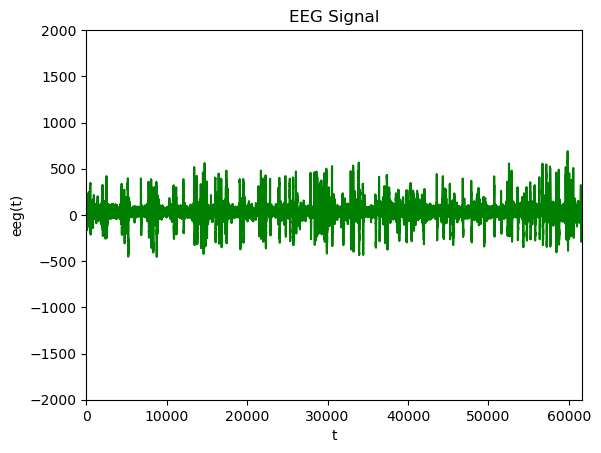

In [22]:
data=signals2.values
eeg_val=data[:,2]
plt.plot(eeg_val,'g', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg_val)])
plt.show()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.lineplot(x="date", y="eeg",  hue="tos", data=signals2)
#plt.show()

## Pruebo aplicando filtros temporales a la señal para eliminar el ruido

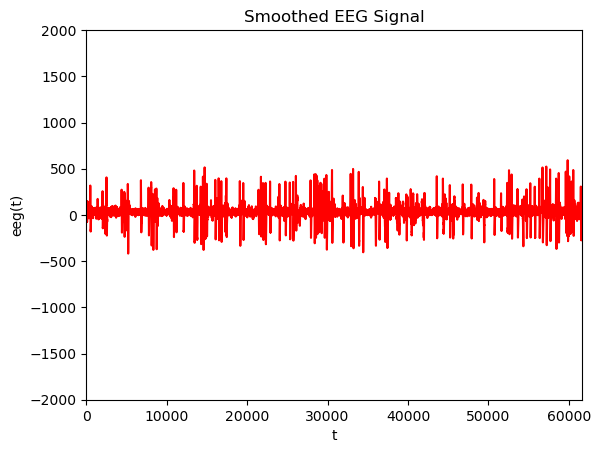

In [24]:
data = signals2.values

eeg = data[:,2]

# La operación de convolución permite implementar el suavizado del Moving Average
windowlength = 10
avgeeg = np.convolve(eeg, np.ones((windowlength,))/windowlength, mode='same')

# El kernel/máscara está compuesto de 10 valores de 1/10.  Cuando esos valores se suman para cada posición, implica que se reemplaza el valor por el promedio
# de los 5 valores anteriores y 4 posteriores.

signals2['eegavg']=avgeeg

plt.plot(avgeeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Smoothed EEG Signal')     
plt.ylim([-2000, 2000]);
plt.xlim([0,len(avgeeg)])
plt.show()


In [25]:
signals2.head()

,timestamp,counter,eeg,attention,meditation,blinking,date,tos,eegavg
38583,1.655925e+09,51,21,69,24,0,2022-06-22 20:06:20.009999872,0,-0.2
38584,1.655925e+09,52,16,69,24,0,2022-06-22 20:06:20.009999872,0,-1.3
38585,1.655925e+09,53,9,69,24,0,2022-06-22 20:06:20.009999872,0,6.3
38586,1.655925e+09,54,-10,69,24,0,2022-06-22 20:06:20.009999872,0,17.7
38587,1.655925e+09,55,-38,69,24,0,2022-06-22 20:06:20.009999872,0,21.5


In [26]:
#sns.set(style="darkgrid")
#sns.lineplot(x="date", y="eegavg",  hue="tos", data=signals2)
#plt.show()

No parece haber cambios muy significativos al aplicar el filtro de ruido.

# Extracción de features de la señal

Voy a realizar la extracción de features de cada señal por separado:
- signals_baseline
- signals_tos



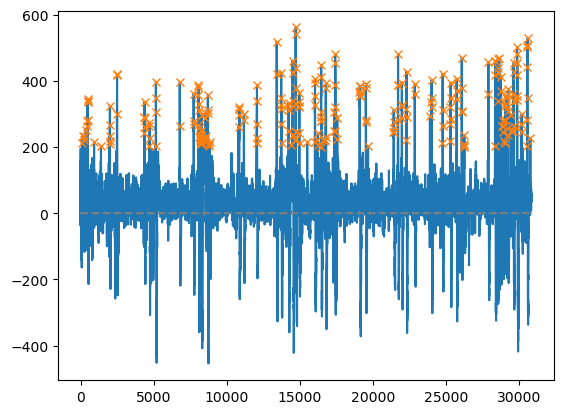

In [27]:
#lo primero quiero identificar los picos de signals_baseline
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data = signals_baseline.values
eeg = data[:,2]

peaks, _ = find_peaks(eeg, height=200)
plt.plot(eeg,label='EEG peaks - signals_baseline')
plt.plot(peaks, eeg[peaks], "x")
plt.plot(np.zeros_like(eeg), "--", color="gray")
plt.show()

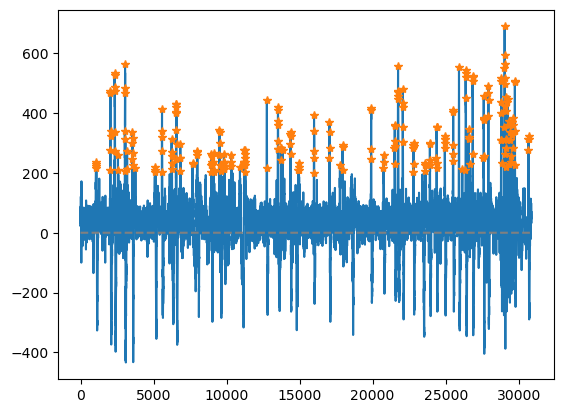

In [28]:
#lo primero quiero identificar los picos de signals_tos
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

data = signals_tos.values
eeg = data[:,2]

peaks, _ = find_peaks(eeg, height=200)
plt.plot(eeg, label='EEG peaks - signals_tos')
plt.plot(peaks, eeg[peaks], "*")
plt.plot(np.zeros_like(eeg), "--", color="gray")
plt.show()

In [29]:
#funciones para extraer features

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq

def crest_factor(x):
    return np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))

def hjorth(a):
    r"""
    Compute Hjorth parameters [HJO70]_.
    .. math::
        Activity = m_0 = \sigma_{a}^2
    .. math::
        Complexity = m_2 = \sigma_{d}/ \sigma_{a}
    .. math::
        Morbidity = m_4 =  \frac{\sigma_{dd}/ \sigma_{d}}{m_2}
    Where:
    :math:`\sigma_{x}^2` is the mean power of a signal :math:`x`. That is, its variance, if it's mean is zero.
    :math:`a`, :math:`d` and :math:`dd` represent the original signal, its first and second derivatives, respectively.
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which appear to uses a non normalised (by the length of the signal) definition of the activity:
        .. math::
            \sigma_{a}^2 = \sum{\mathbf{x}[i]^2}
        As opposed to
        .. math::
            \sigma_{a}^2 = \frac{1}{n}\sum{\mathbf{x}[i]^2}
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: activity, complexity and morbidity
    :rtype: tuple(float, float, float)
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> activity, complexity, morbidity = pr.univariate.hjorth(noise)
    """

    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return activity, morbidity, complexity

def pfd(a):
    r"""
    Compute Petrosian Fractal Dimension of a time series [PET95]_.
    It is defined by:
    .. math::
        \frac{log(N)}{log(N) + log(\frac{N}{N+0.4N_{\delta}})}
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which implemented an apparently erroneous formulae:
        .. math::
            \frac{log(N)}{log(N) + log(\frac{N}{N}+0.4N_{\delta})}
    Where:
    :math:`N` is the length of the time series, and
    :math:`N_{\delta}` is the number of sign changes.
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: the Petrosian Fractal Dimension; a scalar.
    :rtype: float
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> pr.univariate.pdf(noise)
    """

    diff = np.diff(a)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(a)

    return np.log(n)/(np.log(n)+np.log(n/(n+0.4*N_delta)))

## creo los dos vectores defeatures uno para baseline y otro para tos

In [30]:
from collections import Counter
from scipy import stats

len(signals_baseline)/512
len(signals_tos)/512

60.29296875

In [31]:
##creo una funcion para obtener los features a partir de un vector de nunpy de frecuencia

def getfeatures(eeg_in):
    features=[]
    ptp = abs(np.max(eeg_in)) + abs(np.min(eeg_in))
    features.insert(1,ptp)

    rms = np.sqrt(np.mean(eeg_in**2))
    features.insert(1,rms)

    cf = crest_factor(eeg_in)
    features.insert(1,cf)

    entropy = stats.entropy(list(Counter(eeg_in).values()), base=2)
    features.insert(1,entropy)

    activity, complexity, morbidity = hjorth(eeg_in)
    features.insert(1,activity)
    features.insert(1,complexity)
    features.insert(1,morbidity)
    fractal = pfd(eeg_in)
    features.insert(1,fractal)
    return features

In [32]:
#signals_baseline.head()
print(signals_baseline.iloc[0:1024,:])
s_temp=signals_baseline.iloc[0:1024,:]
data = s_temp.values
eeg = data[:,2]
#print(eeg)
features_baseline=getfeatures(eeg)
print('aqui')
print(features_baseline)

          timestamp  counter  eeg  attention  meditation  blinking  \
38583  1.655925e+09       51   21         69          24         0   
38584  1.655925e+09       52   16         69          24         0   
38585  1.655925e+09       53    9         69          24         0   
38586  1.655925e+09       54  -10         69          24         0   
38587  1.655925e+09       55  -38         69          24         0   
...             ...      ...  ...        ...         ...       ...   
39602  1.655925e+09       78   29         57          16         0   
39603  1.655925e+09       79   24         57          16         0   
39604  1.655925e+09       80   49         57          16         0   
39605  1.655925e+09       81   77         57          16         0   
39606  1.655925e+09       82   77         57          16         0   

                               date  tos  
38583 2022-06-22 20:06:20.009999872    0  
38584 2022-06-22 20:06:20.009999872    0  
38585 2022-06-22 20:06:20.0099

In [33]:
##defino una funcion que me calcula los features segun el tamaño de la ventana 
def features_signals(signal,ventana):
    i=0
    features=[]
    N_signals=signal.timestamp.count()
    #print(N_signals)
    while i<N_signals:
     #   print(i)
        s_temp = signal.iloc[i:i+ventana,:]
        #print(s_temp['date'])
        data = s_temp.values
        eeg = data[:,2]
        f_temp=getfeatures(eeg)
      #  print(f_temp)
        features.append(f_temp)
        i=i+ventana
    return(features)

In [34]:
##voy a tomar los features con una ventana de 2 segundos y durante la señal que son 60 segundos.


#son 512 muestras por segundo
freq=512
#hago una ventana de 2 segundos para cada feature
ventana=freq*2  

features_baseline=features_signals(signals_baseline,ventana)
features_tos=features_signals(signals_tos,ventana)



In [35]:
import sys, select

import platform
import socket
#import gevent

import time
import datetime
import os

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

from scipy.signal import butter, lfilter

In [38]:
#pip install tensorflow

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.



     -------------------------------------- 266.3/266.3 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 14.9 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 12.0 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 13.4 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     -------------------------------------- 126.5/126.5 kB 7.3 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     ------------------------------------- 895.9/895.9 kB 18.8 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 18.9 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     -------------------------------------- 439.2/439.2 kB 9.1 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ------------------------------------- 177.8/177.8 kB 11.2 MB/s eta 0:00:00
     ------------------------------------- 781.3/781.

In [39]:
#pip install keras
#import tensorflow
import keras

In [40]:
def classify(afeatures1, afeatures2, featuresize):

    print ('Feature 1 Size %d,%d' % (afeatures1.shape))
    print ('Feature 2 Size %d,%d' % (afeatures2.shape))

   # afeatures1 = reshapefeature(afeatures1, featuresize)
  #  afeatures2 = reshapefeature(afeatures2, featuresize)

    featuredata = np.concatenate ((afeatures1,afeatures2))
    featurelabels = np.concatenate( (np.zeros(afeatures1.shape[0]),(np.zeros(afeatures2.shape[0])+1) )  )

    boundary = int(featuredata.shape[0]/2.0)

    print ('Boundary %d:' % boundary)

    # Reshape and shuffle the features
    reorder = np.random.permutation(featuredata.shape[0])

    trainingdata = featuredata[reorder[0:boundary]]
    traininglabels = featurelabels[reorder[0:boundary]]

    testdata = featuredata[reorder[boundary+1:featuredata.shape[0]]]
    testlabels = featurelabels[reorder[boundary+1:featuredata.shape[0]]]

    print ('Training Dataset Size %d,%d' % (trainingdata.shape))
    print ('Test Dataset Size %d,%d' % (testdata.shape))


    clf = svm.SVC(kernel='linear', C = 1.0)
    clf.fit(trainingdata,traininglabels)


    predlabels = clf.predict(testdata)
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('SVM Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    target_names = ['baseline', 'Tos']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    from sklearn.linear_model import LogisticRegression

    # all parameters not specified are set to their defaults
    logisticRegr = LogisticRegression()
    logisticRegr.fit(trainingdata,traininglabels)

    # Returns a NumPy Array
    # Predict for One Observation (image)
    predlabels = logisticRegr.predict(testdata)
   
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('LogReg Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    target_names = ['baseline', 'Tos']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    from keras.models import Sequential
    from keras.layers import Dense

    model = Sequential([
        Dense(64, activation='tanh', input_shape=(trainingdata.shape[1],)),
        Dense(32, activation='tanh'),
        Dense(1, activation='sigmoid'),
    ])
    model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

    hist = model.fit(trainingdata, traininglabels,
          batch_size=10, epochs=1000*trainingdata.shape[1],verbose=0,
          validation_split=0.4)

    predlabels = model.predict(testdata)
    #print(predlabels)
    predlabels = predlabels.round()
    #print(predlabels)
    C = confusion_matrix(testlabels, predlabels)
    acc = (float(C[0,0])+float(C[1,1])) / ( testdata.shape[0])
    print ('Keras Feature Dim: %d Accuracy: %f' % (featuresize,acc))
    print(C)

    print(model.evaluate(testdata,testlabels))
    print ('Keras Model Accuracy: %f' % (model.evaluate(testdata,testlabels)[1]))

    target_names = ['baseline', 'Tos']
    report = classification_report(testlabels, predlabels, target_names=target_names)
    print(report)

    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()


    #plt.plot(hist.history['acc'])
    #plt.plot(hist.history['val_acc'])
    #plt.title('Model accuracy')
    #plt.ylabel('Accuracy')
    #plt.xlabel('Epoch')
    #plt.legend(['Train', 'Val'], loc='lower right')
    #plt.show()

(31, 8)
(31, 8)
[6.38032258e+02 1.01725595e+00 4.96401988e+00 2.25890082e-01
 1.10970630e+04 7.44193877e+00 3.85891178e+00 9.90775680e+01]
[6.63838710e+02 1.01772831e+00 5.49852608e+00 2.04047301e-01
 1.20645158e+04 7.53172181e+00 3.85105556e+00 1.04409827e+02]


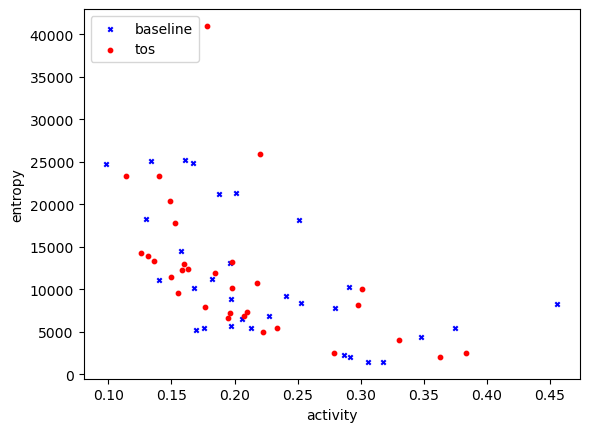

In [41]:
 # utilizo todo lo mismo de los ejemplos
afeatures1 = np.asarray(features_baseline)
afeatures2 = np.asarray(features_tos)

##el orden de los features son:
#0 ptp 
#1 rms
#2  crest factor
#3 entropy
#4,5 y6  activity, complexity, morbidit
#7 fractal

print (afeatures1.shape)
print( afeatures2.shape)

print (afeatures1.mean(0))
print (afeatures2.mean(0))

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(afeatures1[:,3], afeatures1[:,4], s=10, c='b', marker="x", label='baseline')
ax1.scatter(afeatures2[:,3], afeatures2[:,4], s=10, c='r', marker="o", label='tos')
plt.xlabel('activity')
plt.ylabel('entropy')
plt.legend(loc='upper left')
plt.show()


Probando con los distintos features ningun parece a simple vista permitir una clasificación/separación

Feature 1 Size 31,8
Feature 2 Size 31,8
Boundary 31:
Training Dataset Size 31,8
Test Dataset Size 30,8
SVM Feature Dim: 2 Accuracy: 0.500000
[[ 5  9]
 [ 6 10]]
              precision    recall  f1-score   support

    baseline       0.45      0.36      0.40        14
         Tos       0.53      0.62      0.57        16

    accuracy                           0.50        30
   macro avg       0.49      0.49      0.49        30
weighted avg       0.49      0.50      0.49        30

LogReg Feature Dim: 2 Accuracy: 0.500000
[[8 6]
 [9 7]]
              precision    recall  f1-score   support

    baseline       0.47      0.57      0.52        14
         Tos       0.54      0.44      0.48        16

    accuracy                           0.50        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.51      0.50      0.50        30

1/1 [==============================] - 0s 240ms/step
Keras Feature Dim: 2 Accuracy: 0.466667
[[14  0]
 [16  0]]
1/1 [=============

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


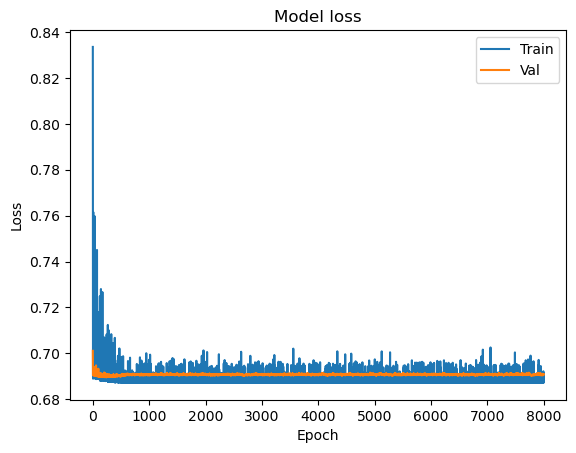

In [42]:
  
# Group time features in tuples, 4-tuples and 8-tuples and classify them
classify(afeatures1, afeatures2,2)
   


    